In [1]:
import time
import random
import ai2thor
import ai2thor_colab

from ai2thor_colab import plot_frames
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

In [3]:
import torch
torch.cuda.is_available()

True

## Workspace

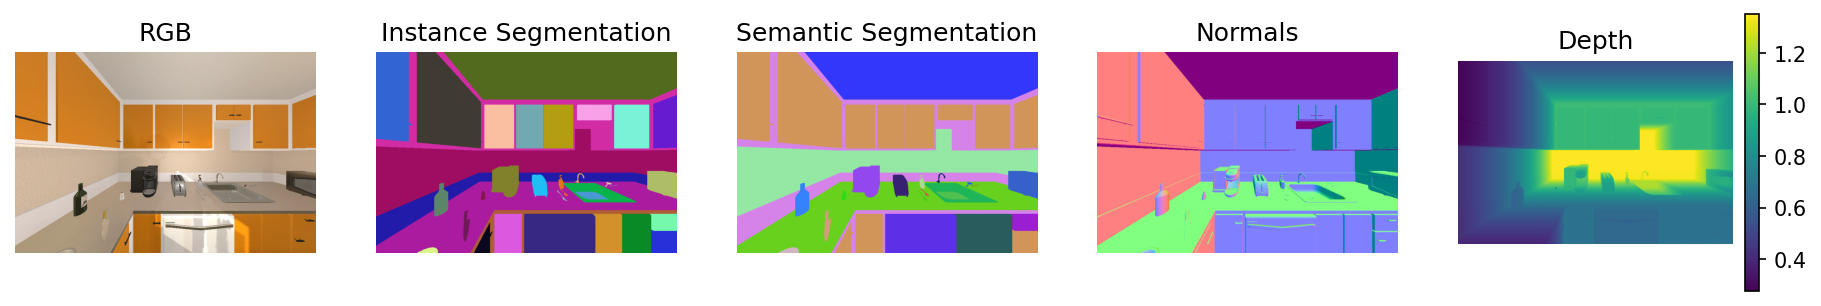

In [4]:
floor_index = random.randint(0, 30)
floor_index = 20

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 1.5,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = True,
    renderDepthImage = True,
    renderSemanticSegmentation = True,
    renderNormalsImage = True,
    
    # camera properties
    width = 900,
    height = 600,
    fieldOfView = 120
)

plot_frames(controller.last_event)

In [5]:
import pandas as pd

data = controller.last_event.metadata['objects']

df_data = pd.DataFrame(data)

In [9]:
action_space = ["MoveAhead", "MoveLeft", "MoveRight", "MoveBack", "RotateLeft", "RotateRight"]

for i in range(100):
    
    random_index = random.randint(0, 5)
    
    clear_output(wait=True)
    
    if action_space[random_index] == "RotateLeft" or action_space[random_index] == "RotateRight":
        print("Action:", i+1)
        print("Action:\033[91m", action_space[random_index])
    else:
        print("Action:", i+1)
        print("Action:\033[92m", action_space[random_index])
    
    controller.step(
        action = action_space[random_index]
    )
    
    time.sleep(1)
    

Action: 100
Action: RotateLeft


---